## DBSCAN Clustering Anomalies Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
X, true_labels = make_circles(n_samples=750, noise=0.1, factor=0.3, random_state=42)

In [3]:
X

array([[-0.22710862,  0.33272414],
       [ 0.89853868, -0.0431158 ],
       [-0.47157146,  0.75244591],
       ...,
       [-0.25676815, -0.93679006],
       [ 0.20625415,  0.32937565],
       [ 0.02865373,  1.14665207]])

In [4]:
true_labels

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [5]:
## Standardize the data
from sklearn.preprocessing import StandardScaler

In [6]:
X_scaled = StandardScaler().fit_transform(X)

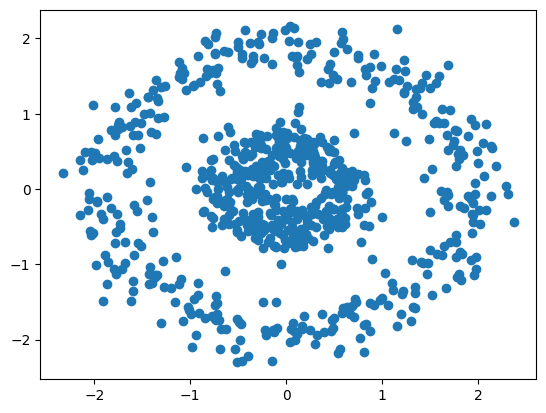

In [7]:
## Visualize the data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
dbscan = DBSCAN(eps=0.122)

In [10]:
dbscan.fit(X)

DBSCAN(eps=0.122)

In [11]:
labels = dbscan.labels_

In [12]:
labels

array([ 0,  1,  2,  3,  1,  0,  1,  2,  0,  0,  2,  1,  1,  0,  3,  3,  2,
        3,  1,  0,  0,  0,  0,  1, -1,  0,  3,  1,  3,  3,  1,  0,  0,  1,
        1,  2,  3,  0,  2,  0,  2,  0,  2,  2,  0,  0,  0,  0,  0,  0,  2,
        0,  1, -1,  0,  2,  0,  2,  0,  2, -1,  3,  0,  0,  3,  3,  1,  2,
        0,  0,  0,  0,  3,  0,  0,  0,  0,  2,  3, -1,  3,  2,  0,  0,  2,
        1,  0,  0,  0,  1,  0, -1,  0,  0,  2,  1,  0,  1,  2,  2,  2,  0,
        1,  0,  2,  2,  0,  0,  0,  2,  0,  0,  2,  0,  0,  0,  0,  1,  0,
        2,  0,  2,  0,  1,  0, -1, -1,  0,  3,  0,  3,  2,  3,  1,  0,  1,
        3,  1,  2,  0,  0,  2,  0,  0,  2,  0,  2,  0,  0,  2,  0,  2,  2,
        2,  0,  3,  1,  0,  2,  0,  2,  0,  0,  0,  2,  0,  2,  0,  2,  3,
        3,  2,  1,  0,  2,  1,  0,  0,  2,  2,  0,  2,  3,  0,  1,  0,  0,
        2,  0,  0,  0,  1,  0,  2,  2,  2,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  2,  0,  2,  1,  0,  2,  2,  0,  0,  2,  0,  3,  1,  1,  0,  3,
        0,  3,  0,  3,  0

In [13]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 17


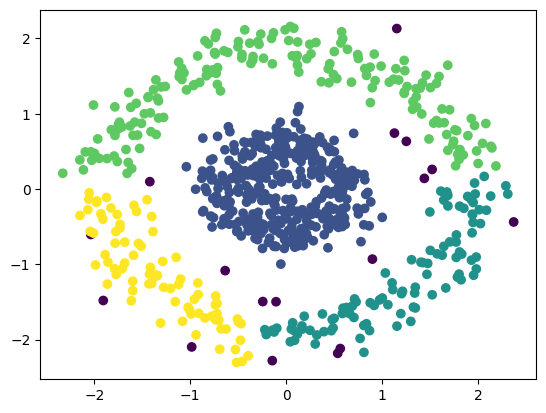

In [14]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels)

In [15]:
## Metrics
from sklearn.metrics import silhouette_score

In [16]:
sil_s = silhouette_score(X_scaled, labels)

In [17]:
sil_s

0.35973060040656296